In [10]:
#https://keras.io/examples/cifar10_resnet/
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import os
import matplotlib.pyplot as plt
#from keras.applications.resnet50 import Residual

In [13]:
"""Train a convnet on the MNIST database with ResNets.
ResNets are a bit overkill for this problem, but this illustrates how to use
the Residual wrapper on ConvNets.
See: https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
"""
from __future__ import print_function
from numpy import random
random.seed(42)  # @UndefinedVariable

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.applications.resnet50 import ResNet50
# from keras.applications.resnet50 import Residual
#from resnet import Residual

batch_size = 128
nb_classes = 10
nb_epoch = 200

img_rows, img_cols = 28, 28
pool_size = (2, 2)
kernel_size = (3, 3)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Model
input_var = Input(shape=input_shape)

conv1 = Convolution2D(64, kernel_size[0], kernel_size[1],
                      border_mode='same', activation='relu')(input_var)
# conv1 = MaxPooling2D(pool_size=pool_size)(conv1)
conv2 = Convolution2D(8, kernel_size[0], kernel_size[1],
                      border_mode='same', activation='relu')(conv1)

resnet = conv2
for _ in range(5):
#     resnet = Residual(Convolution2D(8, kernel_size[0], kernel_size[1],
#                                   border_mode='same'))(resnet)
    resnet = Activation('relu')(resnet)

mxpool = MaxPooling2D(pool_size=pool_size)(resnet)
flat = Flatten()(mxpool)
dropout = Dropout(0.5)(flat)
softmax = Dense(nb_classes, activation='softmax')(dropout)

model = Model(input=[input_var], output=[softmax])
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
#model.save('mnist_model.h5')
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


/home/schandrasekhar/kerasenv/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
/home/schandrasekhar/kerasenv/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", padding="same")`
/home/schandrasekhar/kerasenv/lib/python3.6/site-packages/ipykernel_launcher.py:71: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
/home/schandrasekhar/kerasenv/lib/python3.6/site-packages/ipykernel_launcher.py:77: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 15s - loss: 0.5162 - acc: 0.8361 - val_loss: 0.1902 - val_acc: 0.9456
Epoch 2/200
60000/60000 [==============================] - 14s - loss: 0.2349 - acc: 0.9302 - val_loss: 0.1338 - val_acc: 0.9600
Epoch 3/200
60000/60000 [==============================] - 14s - loss: 0.1857 - acc: 0.9448 - val_loss: 0.1087 - val_acc: 0.9668
Epoch 4/200
60000/60000 [==============================] - 16s - loss: 0.1603 - acc: 0.9524 - val_loss: 0.0939 - val_acc: 0.9716
Epoch 5/200
60000/60000 [==============================] - 14s - loss: 0.1460 - acc: 0.9561 - val_loss: 0.0852 - val_acc: 0.9734
Epoch 6/200
60000/60000 [==============================] - 14s - loss: 0.1344 - acc: 0.9602 - val_loss: 0.0815 - val_acc: 0.9747
Epoch 7/200
60000/60000 [==============================] - 14s - loss: 0.1230 - acc: 0.9631 - val_loss: 0.0729 - val_acc: 0.9781
Epoch 8/200
60000/60000 [======================

60000/60000 [==============================] - 14s - loss: 0.0569 - acc: 0.9829 - val_loss: 0.0378 - val_acc: 0.9871
Epoch 64/200
60000/60000 [==============================] - 14s - loss: 0.0583 - acc: 0.9820 - val_loss: 0.0371 - val_acc: 0.9873
Epoch 65/200
60000/60000 [==============================] - 14s - loss: 0.0565 - acc: 0.9829 - val_loss: 0.0388 - val_acc: 0.9878
Epoch 66/200
60000/60000 [==============================] - 14s - loss: 0.0581 - acc: 0.9827 - val_loss: 0.0379 - val_acc: 0.9875
Epoch 67/200
60000/60000 [==============================] - 14s - loss: 0.0583 - acc: 0.9820 - val_loss: 0.0390 - val_acc: 0.9880
Epoch 68/200
60000/60000 [==============================] - 14s - loss: 0.0570 - acc: 0.9824 - val_loss: 0.0366 - val_acc: 0.9877
Epoch 69/200
60000/60000 [==============================] - 14s - loss: 0.0586 - acc: 0.9823 - val_loss: 0.0369 - val_acc: 0.9875
Epoch 70/200
60000/60000 [==============================] - 14s - loss: 0.0567 - acc: 0.9825 - val_loss

60000/60000 [==============================] - 14s - loss: 0.0495 - acc: 0.9850 - val_loss: 0.0329 - val_acc: 0.9886
Epoch 126/200
60000/60000 [==============================] - 14s - loss: 0.0484 - acc: 0.9850 - val_loss: 0.0334 - val_acc: 0.9888
Epoch 127/200
60000/60000 [==============================] - 14s - loss: 0.0482 - acc: 0.9854 - val_loss: 0.0330 - val_acc: 0.9885
Epoch 128/200
60000/60000 [==============================] - 14s - loss: 0.0485 - acc: 0.9849 - val_loss: 0.0341 - val_acc: 0.9883
Epoch 129/200
60000/60000 [==============================] - 14s - loss: 0.0466 - acc: 0.9852 - val_loss: 0.0333 - val_acc: 0.9886
Epoch 130/200
60000/60000 [==============================] - 14s - loss: 0.0458 - acc: 0.9853 - val_loss: 0.0344 - val_acc: 0.9885
Epoch 131/200
60000/60000 [==============================] - 14s - loss: 0.0481 - acc: 0.9849 - val_loss: 0.0328 - val_acc: 0.9890
Epoch 132/200
60000/60000 [==============================] - 14s - loss: 0.0478 - acc: 0.9852 - v

60000/60000 [==============================] - 14s - loss: 0.0442 - acc: 0.9862 - val_loss: 0.0320 - val_acc: 0.9902
Epoch 188/200
60000/60000 [==============================] - 14s - loss: 0.0443 - acc: 0.9862 - val_loss: 0.0317 - val_acc: 0.9893
Epoch 189/200
60000/60000 [==============================] - 14s - loss: 0.0419 - acc: 0.9873 - val_loss: 0.0313 - val_acc: 0.9897
Epoch 190/200
60000/60000 [==============================] - 14s - loss: 0.0429 - acc: 0.9864 - val_loss: 0.0323 - val_acc: 0.9888
Epoch 191/200
60000/60000 [==============================] - 14s - loss: 0.0429 - acc: 0.9868 - val_loss: 0.0324 - val_acc: 0.9896
Epoch 192/200
60000/60000 [==============================] - 15s - loss: 0.0419 - acc: 0.9872 - val_loss: 0.0327 - val_acc: 0.9890
Epoch 193/200
60000/60000 [==============================] - 14s - loss: 0.0423 - acc: 0.9867 - val_loss: 0.0326 - val_acc: 0.9893
Epoch 194/200
60000/60000 [==============================] - 14s - loss: 0.0436 - acc: 0.9863 - v

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


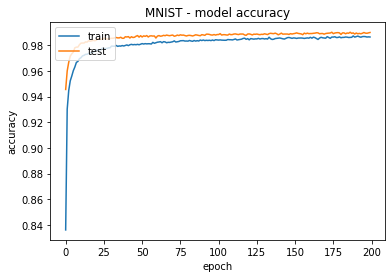

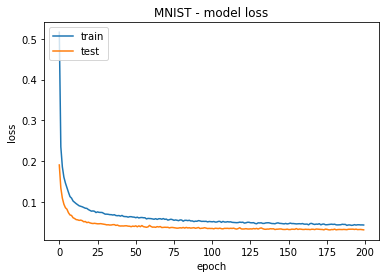

In [15]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('MNIST - model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MNIST - model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()